In [2]:
import pandas as pd
data1 = pd.read_csv('data/questionaire/data1.csv')
data2 = pd.read_csv('data/questionaire/data2.csv')

In [4]:
print(data1.shape)
print(data2.shape)

(645, 36)
(636, 36)


In [6]:
sub1 = data1.drop(['ip'], axis=1)
sub2 = data2.drop(['ip'], axis=1)
sub1.to_csv('data/questionaire/unmarked.csv', index=False)
sub2.to_csv('data/questionaire/marked.csv', index=False)

In [7]:
sub1.head()

,idx,submittime,costtime,source,detail,text_id,M1-1,M1-2,M1-3,M1-4,...,M4-3,M4-4,total_score,text,label,emotion,M1,M2,M3,M4
0,1,2019/12/3 10:19:15,122秒,样本服务,NaN,5,3,4,2,3,...,2,2,58,小女孩死于用完没有收好的手机充电器，她将充电器的一端放进嘴里，触电身亡，女孩父母悔恨不已，主...,HLF,fear,18,21,11,8
1,2,2019/12/3 10:21:11,116秒,样本服务,NaN,1,3,4,3,3,...,2,3,57,紧急通知： 妇幼保健院通知、：现在得白血病的小孩越来越多，妇幼保健院提示您，请不要给宝宝喝爽...,HLF,fear,19,18,8,12
2,3,2019/12/3 10:22:16,166秒,样本服务,NaN,2,2,3,2,2,...,2,2,50,看，安利老板死了！才56岁，吃了27年的纽崔莱，好讽刺啊。再看！安利成冠3S系统创始人陈观田...,HLF,disgust,14,20,9,7
3,4,2019/12/3 10:22:38,133秒,样本服务,NaN,4,3,3,4,3,...,3,3,69,在宁波已发现中国国内第一起埃博拉，此疾病基本死亡率90%。流入中国时间比专家预估时间早十天。...,HLF,fear,20,20,16,13
4,5,2019/12/3 10:23:15,117秒,样本服务,NaN,3,1,3,3,3,...,4,3,64,【可恶！骆驼被砍四肢当街行乞】骆驼一般只在动物园才能见到，但近日，人们却在福州街头见到一只乞...,HLF,anger,15,22,15,12


# M-AVG

In [3]:
data1['keywords'] = 0
data2['keywords'] = 1
data = data1.append(data2)
data = data.reset_index(drop=True)
Motis = {'M1':['M1-1', 'M1-2', 'M1-3', 'M1-4', 'M1-5', 'M1-6'], 
         'M2':['M2-1', 'M2-2', 'M2-3', 'M2-4', 'M2-5', 'M2-6'],
         'M3':['M3-1', 'M3-2', 'M3-3', 'M3-4', 'M3-5'], 
         'M4':['M4-1', 'M4-2', 'M4-3', 'M4-4']}
for m in ['M1', 'M2', 'M3', 'M4']:
    col = Motis[m]
    data[m] = data[col].apply(lambda x: x.sum()/len(x), axis=1)
data['avg'] = data[['M1', 'M2', 'M3', 'M4']].apply(lambda x: x.sum()/len(x), axis=1)
data['M1-avg'] = data['M1'] - data['avg']
data['M2-avg'] = data['M2'] - data['avg']
data['M3-avg'] = data['M3'] - data['avg']
data['M4-avg'] = data['M4'] - data['avg']

In [4]:
data_LHF = data[data['label']=='LHF']
data_HLF = data[data['label']=='HLF']
data_HLT = data[data['label']=='HLT']

## 分组动机

In [5]:
from scipy.stats import ks_2samp

for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    print(m)
    print('    unlabel: LHF-HLF:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==0], 
                                                    data_HLF[m][data_HLF['keywords']==0])))
    print('    unlabel: LHF-HLT:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==0], 
                                                    data_HLT[m][data_HLT['keywords']==0])))
    print('    unlabel: HLF-HLT:{}'.format(ks_2samp(data_HLF[m][data_HLF['keywords']==0], 
                                                    data_HLT[m][data_HLT['keywords']==0])))
    print('    label: LHF-HLF:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==1], 
                                                  data_HLF[m][data_HLF['keywords']==1])))
    print('    label: LHF-HLT:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==1], 
                                                  data_HLT[m][data_HLT['keywords']==1])))
    print('    label: HLF-HLT:{}'.format(ks_2samp(data_HLF[m][data_HLF['keywords']==1], 
                                                  data_HLT[m][data_HLT['keywords']==1])))

M1-avg
    unlabel: LHF-HLF:Ks_2sampResult(statistic=0.23536447754457232, pvalue=1.2108024755597135e-05)
    unlabel: LHF-HLT:Ks_2sampResult(statistic=0.14434523809523808, pvalue=0.01921453614188351)
    unlabel: HLF-HLT:Ks_2sampResult(statistic=0.11721394719025051, pvalue=0.0907231129906716)
    label: LHF-HLF:Ks_2sampResult(statistic=0.24177897574123988, pvalue=6.381765591645383e-06)
    label: LHF-HLT:Ks_2sampResult(statistic=0.15345618056780108, pvalue=0.011511565961241588)
    label: HLF-HLT:Ks_2sampResult(statistic=0.10729862038273254, pvalue=0.1577630092243142)
M2-avg
    unlabel: LHF-HLF:Ks_2sampResult(statistic=0.12708192281651998, pvalue=0.05604977794496813)
    unlabel: LHF-HLT:Ks_2sampResult(statistic=0.16726190476190475, pvalue=0.003970388047542128)
    unlabel: HLF-HLT:Ks_2sampResult(statistic=0.21219109681787407, pvalue=8.808120461378799e-05)
    label: LHF-HLF:Ks_2sampResult(statistic=0.09380053908355795, pvalue=0.2829522130409827)
    label: LHF-HLT:Ks_2sampResult(stat

In [8]:
data_LHF[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']][data_LHF['keywords']==1].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,212.000000,212.000000,212.000000,212.000000
mean,0.073487,0.498801,-0.264092,-0.308196
std,0.380414,0.405410,0.384499,0.409732
min,-1.004167,-0.700000,-1.112500,-1.620833
25%,-0.166667,0.182292,-0.552083,-0.607292
50%,0.037500,0.512500,-0.200000,-0.218750
75%,0.288542,0.791667,0.009375,-0.014583
max,1.058333,1.533333,0.783333,0.787500


In [10]:
data_HLF[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']][data_HLF['keywords']==1].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,210.000000,210.000000,210.000000,210.000000
mean,-0.097599,0.565893,-0.188552,-0.279742
std,0.347347,0.421701,0.333062,0.447777
min,-1.000000,-0.858333,-1.050000,-1.400000
25%,-0.315625,0.300000,-0.450000,-0.582292
50%,-0.102083,0.562500,-0.181250,-0.220833
75%,0.116667,0.856250,0.048958,0.025000
max,0.991667,1.741667,0.700000,0.808333


In [6]:
data_HLT[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']][data_HLT['keywords']==1].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,214.000000,214.000000,214.000000,214.000000
mean,-0.037578,0.353388,-0.264213,-0.051597
std,0.337936,0.395185,0.360444,0.425809
min,-1.045833,-0.720833,-1.237500,-1.312500
25%,-0.240625,0.065625,-0.503125,-0.315625
50%,-0.045833,0.283333,-0.247917,-0.018750
75%,0.156250,0.637500,0.008333,0.244792
max,1.141667,1.483333,0.512500,0.941667


In [6]:
import statsmodels.api as sm
def ecdf(data):
    return sm.distributions.ECDF(data)

In [20]:
import matplotlib.pyplot as plt
import numpy as np

def ccdf_plot_news(column, keywords, ls):
    font1 = { 'weight': 'normal', 'size': 18}
    font2 = { 'weight': 'normal', 'size': 14}
    fig, ax = plt.subplots()
    dp1 = data_HLT[column][data_HLT['keywords']==keywords]
    dp2 = data_HLF[column][data_HLF['keywords']==keywords]
    dp3 = data_LHF[column][data_LHF['keywords']==keywords]
    dp_list = [dp1, dp2, dp3]
    labels = ['HLT news', 'HLF news', 'LHF news']
    colors = ['#7FA5B7', '#385989', '#D22027']
    def dr(d):
        drange = np.arange(min(d),max(d)+0.01,0.01)
        return drange
    for i in range(len(dp_list)):
        ax.plot(dr(dp_list[i]), 
                1-ecdf(dp_list[i])(dr(dp_list[i])), 
                label=labels[i], 
                color=colors[i],
                linewidth=3, 
                linestyle=ls)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=16, colors='black')
    ax.set_xlabel(str(column), font1, color='black')
    ax.set_ylabel('CCDF', font1, color='black')
    if column == 'M1-avg':
        ax.legend(prop=font1)
    plt.tight_layout()
    plt.savefig('images/'+str(column)+'_ccdf_'+str(keywords)+'.pdf')
    plt.savefig('images/'+str(column)+'_ccdf_'+str(keywords)+'.jpg', dpi=600)
    plt.show()

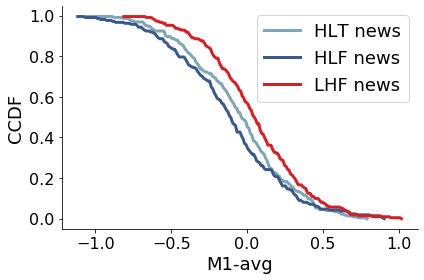

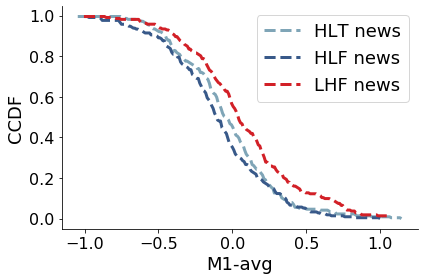

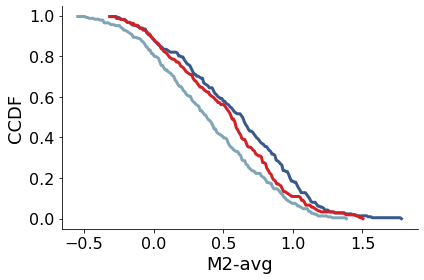

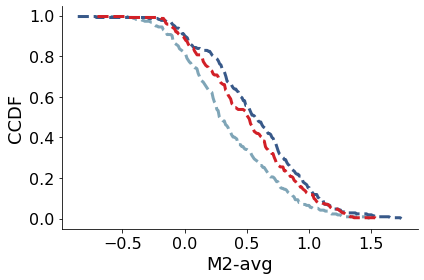

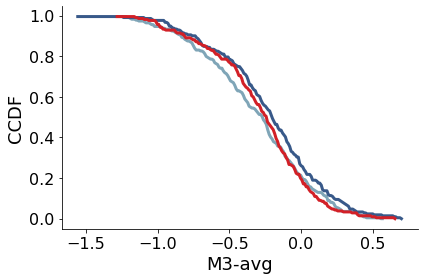

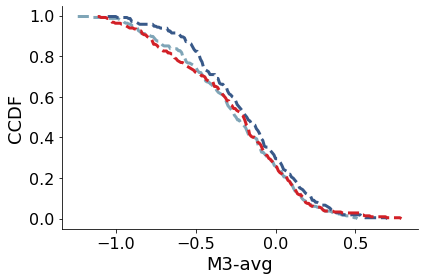

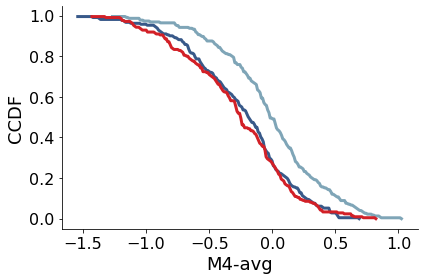

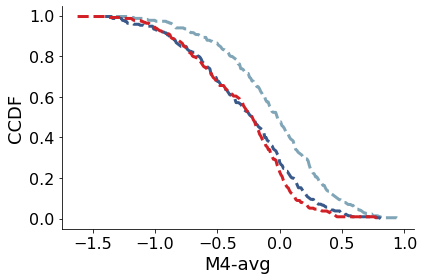

In [25]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    ccdf_plot_news(m, 0, '-')
    ccdf_plot_news(m, 1, '--')

## 情绪anger-other

In [23]:
anger_text = ['5月12日不要去电影院。请大家一定别进影院，大家一起为贞子票房为零，做努力！ 中国人拍的《金陵十三钗》在日本小鬼子票房为零。小日本拍的贞子3D将于5月12日在中国大陆上映。而5月12日既是南京大屠杀纪念日，又是国难日。勿忘国耻！作为中国人，敢不敢让贞子3D 5月12日票房为零。朋友们，必须转起转起',
              '今天下午六点开始，全市高清探头全部启用，副驾驶不系安全带相同处罚，开车时打电话罚款50元，闯黄闪罚款200，越线停车罚款100，今天起晚六点至深夜2点，为期60天的全国交警集中查处酒驾，一经查获，一律拘役六个月，五年内不得考证。请相互转告至有车的本人、朋友及亲属，避免罚款']
#               '【可恶！骆驼被砍四肢当街行乞】骆驼一般只在动物园才能见到，但近日，人们却在福州街头见到一只乞讨的骆驼。骆驼身旁有两位衣衫褴褛的人跪在地上磕头乞讨。民警发现，骆驼的四肢均有不同程度的损伤，四肢均无蹄子，据伤口观测有很大可能是人为造成。警方已协调相关部门处理']
joy_text = ['#天津塘沽大爆炸#我不确定文字真实 我只知道我很感动 我只知道几批消防队员没有生还 他们奔赴爆炸现场的时候那种无畏 可他们为了人民 真的很伟大  没错我做不了什么 我只能给予他们最真诚的感谢🙏   我只是一个刚刚成年的学生 看法自然稚嫩 我只希望人们可以做好自己该做的事 不要被利益地位冲昏头脑',
            '#西部资源重组媒体说明会# 【阙文彬回答媒体提问：继续加大稀贵金属投资】针对媒体关于公司主业方面的提问，西部资源实际控制人阙文彬说，从新能源到文化转到稀贵金属，我个人认为新的董事会或者新的经营班子接上后，应该在2亿-5亿的利润差不多，在这个基础上将现有的一些企业通过一种合法的途径出售，...全文： http://m.weibo.cn/1315587597/4010238174942685',
            '#鹤壁身边事# 【淇滨区兰苑社区刘振强：带爸妈旅行，收获满满的幸福】“我父亲一直想出门走走，特别想去北京看一看。我以前没有在意，感觉父母还年轻，以后有的是机会。直到父亲生了一场大病，需要借助轮椅出行，我才感到了后悔，幸好还来得及补救。”8月16日，淇滨区兰苑社区的刘振强告诉记者，最近他...全文： http://m.weibo.cn/2514256341/4009491428875467',
            '#里约奥运会# 【“不懂球的胖纸”辛苦啦[威武]】那位中国乒乓天团背后的胖子[偷笑]，对！刘国梁，绝对是个全能多面手。魔鬼训练队员，提供呐喊、助威、唤醒服务，送水送毛巾，么么哒队员[亲亲]，还得亲自煮面犒赏三军......于是中国连续三届奥运拿下乒乓全部金牌[奥运金牌]。有网友说：“又当爹又当妈...全文： http://m.weibo.cn/1891503444/4009944795388322',
            '7月12日本报二版为您呈现：中国文物保护基金会召开专项基金工作座谈会、安徽铜陵全力抢险凤凰山铜矿金牛洞古采矿遗址、国博举办《四部医典》曼唐长卷——娘本唐卡艺术传承成果展、湖北实施“三级联审”模式，加快推进文物普查数据审核、新疆举办第一次全国可移动文物普查培训班、《南海诸岛地理志略》...全文： http://m.weibo.cn/1250227403/3997198805156773' 
           ]
data['is_anger'] = data['text'].apply(lambda text: 1 if text in anger_text else 0)
data['is_joy'] = data['text'].apply(lambda text: 1 if text in joy_text else 0)

In [24]:
data_anger = data[data['is_anger']==1]
data_joy = data[data['is_joy']==1]
data_other = data[data['is_anger']!=1]

In [20]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    print(m)
    print('    anger-other:{}'.format(ks_2samp(data_anger[m], data_other[m])))

M1-avg
    anger-other:Ks_2sampResult(statistic=0.12724618149146452, pvalue=0.016039436824046294)
M2-avg
    anger-other:Ks_2sampResult(statistic=0.09490116801437556, pvalue=0.13467073943460095)
M3-avg
    anger-other:Ks_2sampResult(statistic=0.05312219227313567, pvalue=0.7826989635014926)
M4-avg
    anger-other:Ks_2sampResult(statistic=0.06761006289308176, pvalue=0.49429677502332003)


In [21]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    print(m)
    print('    anger-joy:{}'.format(ks_2samp(data_anger[m], data_joy[m])))

M1-avg
    anger-joy:Ks_2sampResult(statistic=0.1338808978969162, pvalue=0.02306741474954177)
M2-avg
    anger-joy:Ks_2sampResult(statistic=0.1246458537648469, pvalue=0.04170488010177398)
M3-avg
    anger-joy:Ks_2sampResult(statistic=0.055614579928081075, pvalue=0.8217609853796517)
M4-avg
    anger-joy:Ks_2sampResult(statistic=0.20212215320910973, pvalue=7.933185479269689e-05)


In [22]:
data_anger[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,168.000000,168.000000,168.000000,168.000000
mean,0.027232,0.443899,-0.269196,-0.201935
std,0.324823,0.392053,0.378696,0.393358
min,-1.004167,-0.475000,-1.283333,-1.325000
25%,-0.176042,0.135417,-0.455208,-0.422917
50%,0.039583,0.379167,-0.206250,-0.164583
75%,0.216667,0.718750,-0.032292,0.058333
max,0.983333,1.495833,0.783333,0.812500


In [24]:
data_other[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,1113.000000,1113.000000,1113.000000,1113.000000
mean,-0.039477,0.491221,-0.257656,-0.194089
std,0.362966,0.424620,0.367132,0.449062
min,-1.116667,-0.858333,-1.558333,-1.620833
25%,-0.270833,0.175000,-0.495833,-0.495833
50%,-0.041667,0.491667,-0.233333,-0.137500
75%,0.191667,0.812500,0.000000,0.108333
max,1.141667,1.779167,0.700000,1.016667


In [25]:
data_joy[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,437.000000,437.000000,437.000000,437.000000
mean,-0.057122,0.334945,-0.272378,-0.005444
std,0.323216,0.383744,0.373137,0.400885
min,-1.058333,-0.720833,-1.241667,-1.162500
25%,-0.266667,0.045833,-0.508333,-0.245833
50%,-0.045833,0.308333,-0.241667,-0.008333
75%,0.133333,0.600000,-0.004167,0.250000
max,1.141667,1.466667,0.691667,1.016667


In [7]:
data_other_1 = data_other[data_other['is_joy']!=1]

In [24]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    print(m)
    print('    anger-other1:{}'.format(ks_2samp(data_anger[m], data_other_1[m])))

M1-avg
    anger-other1:Ks_2sampResult(statistic=0.1235207100591716, pvalue=0.029750929339478538)
M2-avg
    anger-other1:Ks_2sampResult(statistic=0.19396308819385744, pvalue=6.513239245853342e-05)
M3-avg
    anger-other1:Ks_2sampResult(statistic=0.06301070724147648, pvalue=0.6320066723482731)
M4-avg
    anger-other1:Ks_2sampResult(statistic=0.14472386587771202, pvalue=0.006284444527036692)


In [27]:
data_other_1[['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']].describe()

,M1-avg,M2-avg,M3-avg,M4-avg
count,676.000000,676.000000,676.000000,676.000000
mean,-0.028070,0.592246,-0.248139,-0.316038
std,0.386298,0.419381,0.363158,0.436432
min,-1.116667,-0.858333,-1.558333,-1.620833
25%,-0.270833,0.283333,-0.488542,-0.616667
50%,-0.037500,0.627083,-0.220833,-0.254167
75%,0.216667,0.900000,0.005208,-0.004167
max,1.066667,1.779167,0.700000,0.808333


In [30]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    print(m)
    print('    joy-other1:{}'.format(ks_2samp(data_joy[m], data_other_1[m])))

M1-avg
    joy-other1:Ks_2sampResult(statistic=0.08815146304144719, pvalue=0.029916007752578966)
M2-avg
    joy-other1:Ks_2sampResult(statistic=0.27770706674068757, pvalue=1.6653345369377348e-15)
M3-avg
    joy-other1:Ks_2sampResult(statistic=0.040418127902725684, pvalue=0.7584172914058644)
M4-avg
    joy-other1:Ks_2sampResult(statistic=0.27148863282466523, pvalue=1.6653345369377348e-15)


In [26]:
def ccdf_plot_emo(column, ls):
    font1 = { 'weight': 'normal', 'size': 18}
    font2 = { 'weight': 'normal', 'size': 14}
    fig, ax = plt.subplots()
    dp1 = data_joy[column]
    dp2 = data_anger[column]
    dp_list = [dp1, dp2]
    labels = ['Joy', 'Anger']
    colors = ['#81B8DF', '#FE817D']
    def dr(d):
        drange = np.arange(min(d),max(d)+0.01,0.01)
        return drange
    for i in range(len(dp_list)):
        ax.plot(dr(dp_list[i]), 
                1-ecdf(dp_list[i])(dr(dp_list[i])), 
                label=labels[i], 
                color=colors[i],
                linewidth=3, 
                linestyle=ls)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=16, colors='black')
    ax.set_xlabel(str(column), font1, color='black')
    ax.set_ylabel('CCDF', font1, color='black')
    if column == 'M1-avg':
        ax.legend(prop=font1)
    plt.tight_layout()
    plt.savefig('images/'+str(column)+'_ccdf_emo.pdf')
    plt.savefig('images/'+str(column)+'_ccdf_emo.jpg', dpi=600)
    plt.show()

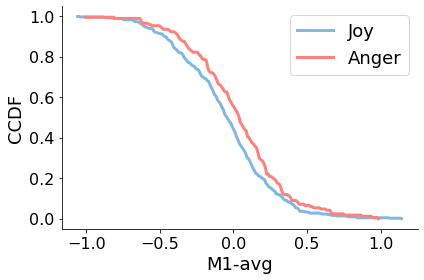

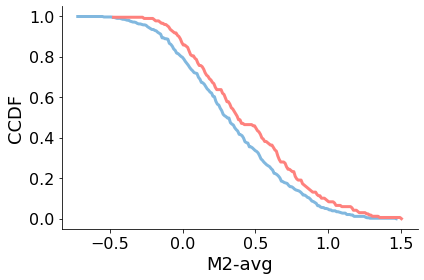

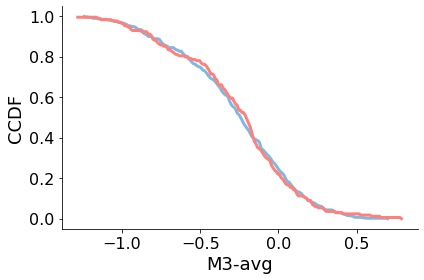

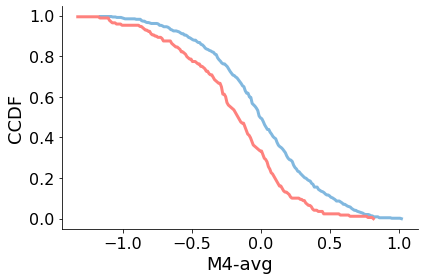

In [28]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    ccdf_plot_emo(m, '-')

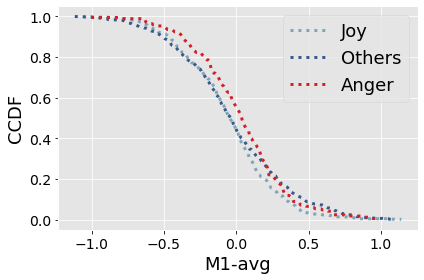

In [12]:
import matplotlib.pyplot as plt
import numpy as np
font1 = {
    'weight' : 'normal',
    'size'   : 18,
}
font2 = {
    'weight' : 'normal',
    'size'   : 14,
}
plt.style.use('ggplot')
fig, ax = plt.subplots()
dp1 = data_anger['M1-avg']
dp2 = data_joy['M1-avg']
dp3 = data_other_1['M1-avg']
def dr(d):
    drange = np.arange(min(d),max(d)+0.01,0.01)
    return drange
ax.plot(dr(dp2), 
        1-ecdf(dp2)(dr(dp2)), 
        label='Joy', color='#7FA5B7',
        linewidth=3, linestyle=':')
ax.plot(dr(dp3), 
        1-ecdf(dp3)(dr(dp3)), 
        label='Others', color='#385989',
        linewidth=3, linestyle=':')
ax.plot(dr(dp1), 
        1-ecdf(dp1)(dr(dp1)), 
        label='Anger', color='#D22027',
        linewidth=3, linestyle=':')
# ax.set_xticks(np.arange(0,1.2,0.2))
ax.tick_params(labelsize=14, colors='black')
# ax.set_ylim(0,1)
# ax.set_xlim(0,1)
ax.set_xlabel('M1-avg', font1, color='black')
ax.set_ylabel('CCDF', font1, color='black')
# ax.legend(prop=font1, loc='upper center', ncol=2)
ax.legend(prop=font1)
plt.tight_layout()
plt.savefig('images/M1_ccdf_emo.pdf')
plt.savefig('images/M1_ccdf_emo.jpg', dpi=600)
plt.show()

# 随机分组

In [29]:
random1 = data.sample(frac=0.5, random_state=2020, axis=0)
random2 = data.append(random1).drop_duplicates(keep=False)
random2.shape

(641, 44)

In [31]:
def ccdf_plot_ran(column, ls):
    font1 = { 'weight': 'normal', 'size': 18}
    font2 = { 'weight': 'normal', 'size': 14}
    fig, ax = plt.subplots()
    dp1 = random1[column]
    dp2 = random2[column]
    dp_list = [dp1, dp2]
    labels = ['Random1', 'Random2']
    colors = ['#81B8DF', '#FE817D']
    def dr(d):
        drange = np.arange(min(d),max(d)+0.01,0.01)
        return drange
    for i in range(len(dp_list)):
        ax.plot(dr(dp_list[i]), 
                1-ecdf(dp_list[i])(dr(dp_list[i])), 
                label=labels[i], 
                color=colors[i],
                linewidth=3, 
                linestyle=ls)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(labelsize=16, colors='black')
    ax.set_xlabel(str(column), font1, color='black')
    ax.set_ylabel('CCDF', font1, color='black')
    if column == 'M1-avg':
        ax.legend(prop=font1)
    plt.tight_layout()
    plt.savefig('images/'+str(column)+'_ccdf_random.pdf')
    plt.savefig('images/'+str(column)+'_ccdf_random.jpg', dpi=600)
    plt.show()

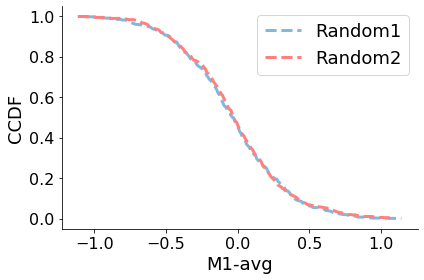

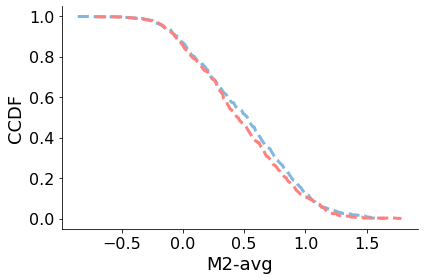

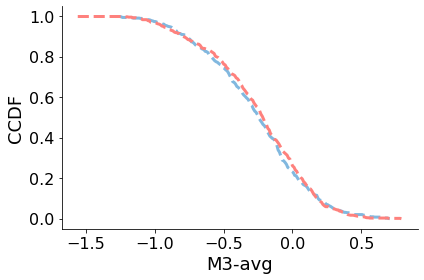

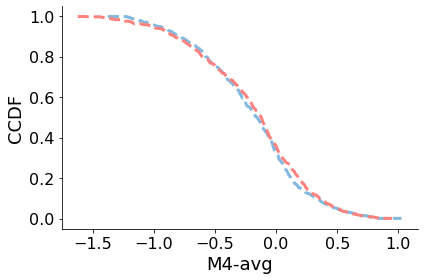

In [32]:
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    ccdf_plot_ran(m, '--')

In [19]:
from scipy.stats import ks_2samp
for m in ['M1-avg', 'M2-avg', 'M3-avg', 'M4-avg']:
    print(m)
    print('    r1-r2:{}'.format(ks_2samp(random1[m], random2[m])))

M1-avg
    r1-r2:Ks_2sampResult(statistic=0.03967433697347894, pvalue=0.6731029224281972)
M2-avg
    r1-r2:Ks_2sampResult(statistic=0.06154202418096724, pvalue=0.1677828053517858)
M3-avg
    r1-r2:Ks_2sampResult(statistic=0.05264723088923557, pvalue=0.3169545188552879)
M4-avg
    r1-r2:Ks_2sampResult(statistic=0.05895817082683307, pvalue=0.20000777899651712)


# M1-other

In [34]:
data1['keywords'] = 0
data2['keywords'] = 1
data = data1.append(data2)
data = data.reset_index(drop=True)
Motis = {'M1':['M1-1', 'M1-2', 'M1-3', 'M1-4', 'M1-5', 'M1-6'], 
         'M2':['M2-1', 'M2-2', 'M2-3', 'M2-4', 'M2-5', 'M2-6'],
         'M3':['M3-1', 'M3-2', 'M3-3', 'M3-4', 'M3-5'], 
         'M4':['M4-1', 'M4-2', 'M4-3', 'M4-4']}
for m in ['M1', 'M2', 'M3', 'M4']:
    col = Motis[m]
    data[m] = data[col].apply(lambda x: x.sum()/len(x), axis=1)
data['M1-other'] = data['M1'] - data[['M2', 'M3', 'M4']].apply(lambda x: x.sum()/len(x), axis=1)
data['M2-other'] = data['M2'] - data[['M1', 'M3', 'M4']].apply(lambda x: x.sum()/len(x), axis=1)
data['M3-other'] = data['M3'] - data[['M1', 'M2', 'M4']].apply(lambda x: x.sum()/len(x), axis=1)
data['M4-other'] = data['M4'] - data[['M2', 'M3', 'M1']].apply(lambda x: x.sum()/len(x), axis=1)

In [35]:
data_LHF = data[data['label']=='LHF']
data_HLF = data[data['label']=='HLF']
data_HLT = data[data['label']=='HLT']

## 分组动机

In [36]:
from scipy.stats import ks_2samp

for m in ['M1-other', 'M2-other', 'M3-other', 'M4-other']:
    print(m)
    print('    unlabel: LHF-HLF:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==0], 
                                                    data_HLF[m][data_HLF['keywords']==0])))
    print('    unlabel: LHF-HLT:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==0], 
                                                    data_HLT[m][data_HLT['keywords']==0])))
    print('    label: LHF-HLF:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==1], 
                                                  data_HLF[m][data_HLF['keywords']==1])))
    print('    label: LHF-HLT:{}'.format(ks_2samp(data_LHF[m][data_LHF['keywords']==1], 
                                                  data_HLT[m][data_HLT['keywords']==1])))

M1-other
    unlabel: LHF-HLF:Ks_2sampResult(statistic=0.23062514105168133, pvalue=1.9489164497343836e-05)
    unlabel: LHF-HLT:Ks_2sampResult(statistic=0.14851190476190476, pvalue=0.01467705926413676)
    label: LHF-HLF:Ks_2sampResult(statistic=0.24177897574123988, pvalue=6.381765591645383e-06)
    label: LHF-HLT:Ks_2sampResult(statistic=0.15345618056780108, pvalue=0.011511565961241588)
M2-other
    unlabel: LHF-HLF:Ks_2sampResult(statistic=0.12708192281651998, pvalue=0.05604977794496813)
    unlabel: LHF-HLT:Ks_2sampResult(statistic=0.17172619047619048, pvalue=0.0028420990138070534)
    label: LHF-HLF:Ks_2sampResult(statistic=0.09380053908355795, pvalue=0.2829522130409827)
    label: LHF-HLT:Ks_2sampResult(statistic=0.18722447540116383, pvalue=0.0009575172980129665)
M3-other
    unlabel: LHF-HLF:Ks_2sampResult(statistic=0.10268562401263823, pvalue=0.1937235831894556)
    unlabel: LHF-HLT:Ks_2sampResult(statistic=0.10029761904761905, pvalue=0.20743302276841513)
    label: LHF-HLF:Ks_2

In [38]:
data_LHF[['M1-other', 'M2-other', 'M3-other', 'M4-other']][data_LHF['keywords']==1].describe()

,M1-other,M2-other,M3-other,M4-other
count,212.000000,212.000000,212.000000,212.000000
mean,0.097982,0.665068,-0.352123,-0.410928
std,0.507218,0.540546,0.512665,0.546309
min,-1.338889,-0.933333,-1.483333,-2.161111
25%,-0.222222,0.243056,-0.736111,-0.809722
50%,0.050000,0.683333,-0.266667,-0.291667
75%,0.384722,1.055556,0.012500,-0.019444
max,1.411111,2.044444,1.044444,1.050000


In [40]:
data_HLF[['M1-other', 'M2-other', 'M3-other', 'M4-other']][data_HLF['keywords']==1].describe()

,M1-other,M2-other,M3-other,M4-other
count,210.000000,210.000000,210.000000,210.000000
mean,-0.130132,0.754524,-0.251402,-0.372989
std,0.463129,0.562268,0.444083,0.597036
min,-1.333333,-1.144444,-1.400000,-1.866667
25%,-0.420833,0.400000,-0.600000,-0.776389
50%,-0.136111,0.750000,-0.241667,-0.294444
75%,0.155556,1.141667,0.065278,0.033333
max,1.322222,2.322222,0.933333,1.077778


In [42]:
data_HLT[['M1-other', 'M2-other', 'M3-other', 'M4-other']][data_HLT['keywords']==1].describe()

,M1-other,M2-other,M3-other,M4-other
count,214.000000,214.000000,214.000000,214.000000
mean,-0.050104,0.471184,-0.352285,-0.068795
std,0.450581,0.526914,0.480592,0.567745
min,-1.394444,-0.961111,-1.650000,-1.750000
25%,-0.320833,0.087500,-0.670833,-0.420833
50%,-0.061111,0.377778,-0.330556,-0.025000
75%,0.208333,0.850000,0.011111,0.326389
max,1.522222,1.977778,0.683333,1.255556


## 情绪anger-other

In [30]:
data_anger = data[data['emotion']=='anger']
data_other = data[data['emotion']!='anger']

In [31]:
for m in ['M1-other', 'M2-other', 'M3-other', 'M4-other']:
    print(m)
    print('    unlabel: anger-other:{}'.format(ks_2samp(data_anger[m][data_anger['keywords']==0], 
                                                    data_other[m][data_other['keywords']==0])))
    print('    label: anger-other:{}'.format(ks_2samp(data_anger[m][data_anger['keywords']==1], 
                                                    data_other[m][data_other['keywords']==1])))

M1-other
    unlabel: anger-other:Ks_2sampResult(statistic=0.12575623992946827, pvalue=0.07181923869227991)
    label: anger-other:Ks_2sampResult(statistic=0.11673344368299739, pvalue=0.11555241718680631)
M2-other
    unlabel: anger-other:Ks_2sampResult(statistic=0.0761560210379108, pvalue=0.5639956447236127)
    label: anger-other:Ks_2sampResult(statistic=0.052333586003124856, pvalue=0.92633094757249)
M3-other
    unlabel: anger-other:Ks_2sampResult(statistic=0.0594047365700909, pvalue=0.8389911176449083)
    label: anger-other:Ks_2sampResult(statistic=0.09784508763516545, pvalue=0.2612671088204028)
M4-other
    unlabel: anger-other:Ks_2sampResult(statistic=0.0902775666555194, pvalue=0.3517165984246472)
    label: anger-other:Ks_2sampResult(statistic=0.09205946506195567, pvalue=0.3276859663893177)


In [57]:
anger_text = ['5月12日不要去电影院。请大家一定别进影院，大家一起为贞子票房为零，做努力！ 中国人拍的《金陵十三钗》在日本小鬼子票房为零。小日本拍的贞子3D将于5月12日在中国大陆上映。而5月12日既是南京大屠杀纪念日，又是国难日。勿忘国耻！作为中国人，敢不敢让贞子3D 5月12日票房为零。朋友们，必须转起转起',
              '今天下午六点开始，全市高清探头全部启用，副驾驶不系安全带相同处罚，开车时打电话罚款50元，闯黄闪罚款200，越线停车罚款100，今天起晚六点至深夜2点，为期60天的全国交警集中查处酒驾，一经查获，一律拘役六个月，五年内不得考证。请相互转告至有车的本人、朋友及亲属，避免罚款']
#               '【可恶！骆驼被砍四肢当街行乞】骆驼一般只在动物园才能见到，但近日，人们却在福州街头见到一只乞讨的骆驼。骆驼身旁有两位衣衫褴褛的人跪在地上磕头乞讨。民警发现，骆驼的四肢均有不同程度的损伤，四肢均无蹄子，据伤口观测有很大可能是人为造成。警方已协调相关部门处理']
data['is_anger'] = data['text'].apply(lambda text: 1 if text in anger_text else 0)

In [58]:
data_anger = data[data['is_anger']==1]
data_other = data[data['is_anger']!=1]

In [59]:
for m in ['M1-other', 'M2-other', 'M3-other', 'M4-other']:
    print(m)
    print('    anger-other:{}'.format(ks_2samp(data_anger[m], data_other[m])))

M1-other
    anger-other:Ks_2sampResult(statistic=0.12724618149146452, pvalue=0.016039436824046294)
M2-other
    anger-other:Ks_2sampResult(statistic=0.09490116801437556, pvalue=0.13467073943460095)
M3-other
    anger-other:Ks_2sampResult(statistic=0.05312219227313567, pvalue=0.7826989635014926)
M4-other
    anger-other:Ks_2sampResult(statistic=0.06761006289308176, pvalue=0.49429677502332003)


In [60]:
data_anger[['M1-other', 'M2-other', 'M3-other', 'M4-other']].describe()

,M1-other,M2-other,M3-other,M4-other
count,168.000000,168.000000,168.000000,168.000000
mean,0.036310,0.591865,-0.358929,-0.269246
std,0.433098,0.522737,0.504928,0.524477
min,-1.338889,-0.633333,-1.711111,-1.766667
25%,-0.234722,0.180556,-0.606944,-0.563889
50%,0.052778,0.505556,-0.275000,-0.219444
75%,0.288889,0.958333,-0.043056,0.077778
max,1.311111,1.994444,1.044444,1.083333


In [61]:
data_other[['M1-other', 'M2-other', 'M3-other', 'M4-other']].describe()

,M1-other,M2-other,M3-other,M4-other
count,1113.000000,1113.000000,1113.000000,1113.000000
mean,-0.052636,0.654962,-0.343541,-0.258785
std,0.483955,0.566160,0.489510,0.598750
min,-1.488889,-1.144444,-2.077778,-2.161111
25%,-0.361111,0.233333,-0.661111,-0.661111
50%,-0.055556,0.655556,-0.311111,-0.183333
75%,0.255556,1.083333,0.000000,0.144444
max,1.522222,2.372222,0.933333,1.355556
